**N·ªôi dung b√†i th·ª±c h√†nh**

Ng∆∞·ªùi h·ªçc ti·∫øp c·∫≠n v√† gi·∫£i quy·∫øt b√†i to√°n ph√¢n l·ªõp vƒÉn b·∫£n s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p Naive Bayser. Sau khi th·ª±c h√†nh, ng∆∞·ªùi h·ªçc c√≥ kh·∫£ nƒÉng:
1. S·ª≠ d·ª•ng ƒë∆∞·ª£c c√°c c√¥ng c·ª• c·ªßa sklearn cho b√†i to√°n ph√¢n l·ªõp
  

*   Thao t√°c v·ªõi d·ªØ li·ªáu
*   Chuy·ªÉn t·ª´ vƒÉn b·∫£n sang kh√¥ng gian vector


2. √Åp d·ª•ng ƒë∆∞·ª£c NB cho b√†i to√°n ph√¢n l·ªõp


*   Hu·∫•n luy·ªán m√¥ h√¨nh
*   ƒê√°nh g√≠a m√¥ h√¨nh


3. C·∫£i ti·∫øn ƒë∆∞·ª£c m√¥ h√¨nh ph√¢n l·ªõp
3. Th·ª±c h√†nh ƒë∆∞·ª£c v·ªõi b√†i to√°n th·ª±c t·∫ø

**Thao t√°c v·ªõi d·ªØ li·ªáu**



*   B√†i th·ª±c h√†nh s·ª≠ d·ª•ng d·ªØ li·ªáu ti·∫øng Anh
*   D·ªØ li·ªáu g·ªìm 18.000 b√†i b√°o ƒë∆∞·ª£c t·ªï ch·ª©c trong 20 l·ªõp (classes/groups)
*   Y√™u c·∫ßu: x√¢y d·ª±ng m√¥ h√¨nh ph√¢n l·ªõp c√°c b√†i b√°o d·ª±a tr√™n m√¥ h√¨nh h·ªçc m√°y Naive Bayes



**ƒê·ªçc d·ªØ li·ªáu**

In [1]:
import warnings
warnings.filterwarnings('ignore')
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

**Quan s√°t d·ªØ li·ªáu hu·∫•n luy·ªán**



*   S·ªë l∆∞·ª£ng d·ªØ li·ªáu hu·∫•n luy·ªán
*   5 vƒÉn b·∫£n ƒë·∫ßu ti√™n



In [2]:
print("The number of training examples", len(twenty_train.data))

# printing top five training examples
twenty_train.data[0:5]

The number of training examples 11314


["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 



*   Danh s√°ch t√™n c√°c l·ªõp



In [3]:
# You can check the target names (categories) and some data files by following commands.
twenty_train.target_names #prints all the categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']



*   Nh√£n c·ªßa c√°c l·ªõp



In [4]:
targets = twenty_train.target
print(targets)

print(len(targets))

[7 4 4 ... 3 1 8]
11314




*  Hi·ªÉn th·ªã d√≤ng ƒë·∫ßu ti√™n c·ªßa vƒÉn b·∫£n ƒë·∫ßu ti√™n



In [5]:
print("\n".join(twenty_train.data[0].split("\n")[:3])) #prints first line of the first data file

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


**Chu·∫©n b·ªã d·ªØ li·ªáu hu·∫•n luy·ªán**

Ph·∫ßn chu·∫©n b·ªã d·ªØ li·ªáu cho hu·∫•n luy·ªán m√¥ h√¨nh l√† vi·ªác chuy·ªÉn c√°c vƒÉn b·∫£n v√†o kh√¥ng gian ƒë·∫∑c tr∆∞ng (vector space model)

*   ƒê·∫∑c tr∆∞ng: s·ª≠ d·ª•ng term frequency (TF) ho·∫∑c TF-IDF
*   ƒê·∫øm s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa c√°c t·ª´
*   D·ª±a tr√™n bag-of-words model





*   T·∫°o ma tr·∫≠n term-document, trong ƒë√≥ gi√° tr·ªã ·ªü m·ªói √¥ l√† s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa t·ª´ trong vƒÉn b·∫£n ch·ª©a n√≥



In [6]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)

In [7]:
print(X_train_counts.shape)

print(X_train_counts[0])

(11314, 130107)
  (0, 56979)	3
  (0, 75358)	2
  (0, 123162)	2
  (0, 118280)	2
  (0, 50527)	2
  (0, 124031)	2
  (0, 85354)	1
  (0, 114688)	1
  (0, 111322)	1
  (0, 123984)	1
  (0, 37780)	5
  (0, 68532)	3
  (0, 114731)	5
  (0, 87620)	1
  (0, 95162)	1
  (0, 64095)	1
  (0, 98949)	1
  (0, 90379)	1
  (0, 118983)	1
  (0, 89362)	3
  (0, 79666)	1
  (0, 40998)	1
  (0, 92081)	1
  (0, 76032)	1
  (0, 4605)	1
  :	:
  (0, 37565)	1
  (0, 113986)	1
  (0, 83256)	1
  (0, 86001)	1
  (0, 51730)	1
  (0, 109271)	1
  (0, 128026)	1
  (0, 96144)	1
  (0, 78784)	1
  (0, 63363)	1
  (0, 90252)	1
  (0, 123989)	1
  (0, 67156)	1
  (0, 128402)	2
  (0, 62221)	1
  (0, 57308)	1
  (0, 76722)	1
  (0, 94362)	1
  (0, 78955)	1
  (0, 114428)	1
  (0, 66098)	1
  (0, 35187)	1
  (0, 35983)	1
  (0, 128420)	1
  (0, 86580)	1




*   Bi·ªÉu di·ªÖn vƒÉn b·∫£n b·∫±ng TF-IDF



In [8]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [9]:
print(X_train_tfidf.shape)

print(X_train_tfidf[0])

#TF-IDF c√†ng cao th√¨ t·ª´ ƒë√≥ c√≥ s·ª± quan tr·ªçng ƒë·∫∑c bi·ªát trong vƒÉn b·∫£n ƒë√≥ thay v√¨ vƒÉn b·∫£n kh√°c, ƒë·ªìng th·ªùi gi·∫£m s·ª± quan tr·ªçng c·ªßa c√°c t·ª´ th√¥ng th∆∞·ªùng

(11314, 130107)
  (0, 128420)	0.04278499079283093
  (0, 128402)	0.05922294083277842
  (0, 128026)	0.060622095889758885
  (0, 124931)	0.08882569909852546
  (0, 124031)	0.10798795154169122
  (0, 123989)	0.08207027465330353
  (0, 123984)	0.036854292634593756
  (0, 123796)	0.049437556160455476
  (0, 123292)	0.14534718515938805
  (0, 123162)	0.2597090245735688
  (0, 118983)	0.037085978050619146
  (0, 118280)	0.2118680720828169
  (0, 115475)	0.042472629883573
  (0, 114731)	0.14447275512784058
  (0, 114688)	0.06214070986309586
  (0, 114579)	0.03671830826216751
  (0, 114455)	0.12287762616208957
  (0, 114428)	0.05511105154696676
  (0, 113986)	0.17691750674853082
  (0, 111322)	0.01915671802495043
  (0, 109581)	0.10809248404447917
  (0, 109271)	0.10844724822064673
  (0, 108252)	0.07526015712540636
  (0, 106116)	0.09869734624201922
  (0, 104813)	0.08462829788929047
  :	:
  (0, 56979)	0.057470154074851294
  (0, 51793)	0.13412921037839678
  (0, 51730)	0.09714744057976722
  (0, 50527)	0.0546142865885

**Hu·∫•n luy·ªán m√¥ h√¨nh**



*   Kh·ªüi t·∫°o ƒë·ªëi t∆∞·ª£ng
*   Hu·∫•n luy·ªán m√¥ h√¨nh
*   Gi·∫£i c√°c tham s·ªë c·ªßa NB



In [10]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‚Äòvect‚Äô , ‚Äòtfidf‚Äô and ‚Äòclf‚Äô are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

**L∆∞u √Ω khi thi·∫øt l·∫≠p th·ª±c nghi·ªám**

·ªû ƒë√¢y, ch√∫ng ta s·ª≠ d·ª•ng c√°ch chia d·ªØ li·ªáu l√†m 2 ph·∫ßn, training-test.
Ch√∫ng ta c≈©ng c√≥ th·ªÉ s·ª≠ d·ª•ng c√°ch k-fold cross-valiation

**Tr·ª±c quan h√≥a qu√° tr√¨nh hu·∫•n luy·ªán c·ªßa NB**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
  
  """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
  
  plt.figure()
  plt.title(title)
  if ylim is not None:
    plt.ylim(*ylim)
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  train_sizes, train_scores, test_scores = learning_curve(
      estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

  plt.legend(loc="best")
  return plt

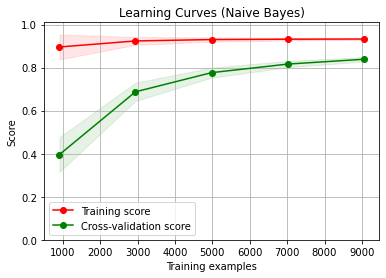

In [12]:
estimator = MultinomialNB()
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
X, y = X_train_tfidf, twenty_train.target
plot_learning_curve(estimator, title, X, y, ylim=(0.0, 1.01), cv=cv, n_jobs=8)
plt.show()

**ƒê√°nh gi√° m√¥ h√¨nh tr√™n d·ªØ li·ªáu test**

In [13]:
import numpy as np

twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicted = text_clf.predict(twenty_test.data) # d·ª± ƒëo√°n c√°c b√†i b√°o trong t·∫≠p test thu·ªôc c√°c l·ªõp n√†o
np.mean(predicted == twenty_test.target) #tr·∫£ v·ªÅ x√°c su·∫•t d·ª± ƒëo√°n trung b√¨nh cho t·∫•t c·∫£ t·∫≠p test

0.7738980350504514

**Confusion matrix**

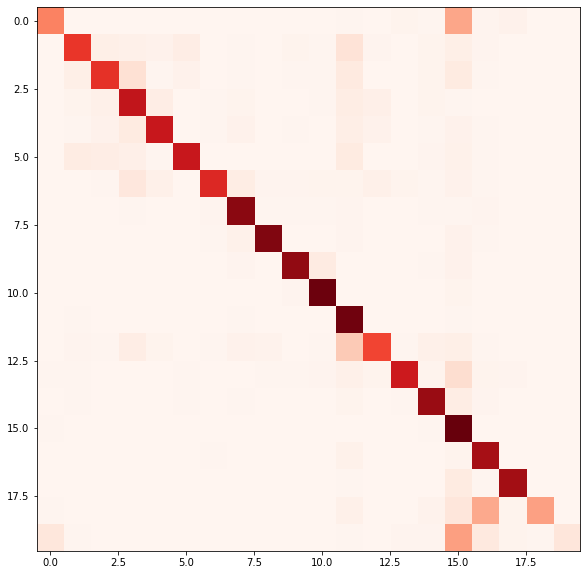

[[166   0   0   1   0   1   0   0   1   1   1   3   0   6   3 123   4   8
    0   1]
 [  1 252  15  12   9  18   1   2   1   5   2  41   4   0   6  15   4   1
    0   0]
 [  0  14 258  45   3   9   0   2   1   3   2  25   1   0   6  23   2   0
    0   0]
 [  0   5  11 305  17   1   3   6   1   0   2  19  13   0   5   3   1   0
    0   0]
 [  0   3   8  23 298   0   3   8   1   3   1  16   8   0   2   8   3   0
    0   0]
 [  1  21  17  13   2 298   1   0   1   1   0  23   0   1   4  10   2   0
    0   0]
 [  0   1   3  31  12   1 271  19   4   4   6   5  12   6   3   9   3   0
    0   0]
 [  0   1   0   3   0   0   4 364   3   2   2   4   1   1   3   3   4   0
    1   0]
 [  0   0   0   1   0   0   2  10 371   0   0   4   0   0   0   8   2   0
    0   0]
 [  0   0   0   0   1   0   0   4   0 357  22   0   0   0   2   9   1   1
    0   0]
 [  0   0   0   0   0   0   0   1   0   4 387   1   0   0   1   5   0   0
    0   0]
 [  0   2   1   0   0   1   1   3   0   0   0 383   1   0   0   3

In [14]:
from sklearn.metrics import confusion_matrix
# s·ª≠ d·ª•ng confusion matrix ƒë·ªÉ ƒë√°nh gi√° ch·∫•t l∆∞·ª£ng ƒë·∫ßu ra c·ªßa b·ªô ph√¢n lo·∫°i tr√™n t·∫≠p d·ªØ li·ªáu test
cm = confusion_matrix(twenty_test.target, predicted)
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap="Reds")
plt.show()
print(cm)

**C·∫£i ti·∫øn m√¥ h√¨nh**

Hi·ªáu qu·∫£ c·ªßa m√¥ h√¨nh c√≥ th·ªÉ c·∫£i ti·∫øn b·∫±ng nhi·ªÅu ph∆∞∆°ng ph√°p, trong ƒë√≥ m·ªôt trong nh·ªØng ph∆∞∆°ng ph√°p ƒë∆°n gi·∫£n l√† c·∫£i ti·∫øn qu√° tr√¨nh chuy·ªÉn t·ª´ vƒÉn b·∫£n sang kh√¥ng gian vector. Trong ph·∫ßn n√†y, m√¥ h√¨nh s·∫Ω ƒë∆∞·ª£c c·∫£i ti·∫øng b·∫±ng c√°ch s·ª≠ d·ª•ng:



*   Lo·∫°i b·ªè c√°c t·ª´ d·ª´ng
*   ƒê∆∞a m·ªôt t·ª´ v·ªÅ t·ª´ g·ªëc





*   Kh·ªüi t·∫°o m√¥ h√¨nh c√≥ d√πng th√™m tham s·ªë lo·∫°i b·ªè ƒëi c√°c t·ª´ d·ª´ng



In [15]:
# NLTK
# Removing stop words in English
#Lo·∫°i b·ªè stop words: Nh·ªØng t·ª´ xu·∫•t hi·ªán th∆∞·ªùng xuy√™n trong b·∫•t k·ª≥ vƒÉn b·∫£n n√†o nh∆∞ 'and', 'the', 'of', ... ƒë∆∞·ª£c lo·∫°i b·ªè.
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])



*   S·ª≠ d·ª•ng stemming(g·ªëc t·ª´), v√† hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh
*   When downloading NLTK, you mal use *all* to download all packages



In [16]:
# Stemming Code

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Long\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
print('steming the corpus... Please wait...')

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        #√°p d·ª•ng stemming (stemmer.stem(w)) l√™n t·ª´ng t·ª´ trong vƒÉn b·∫£n
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('mnb', MultinomialNB(fit_prior=False))])

text_mnb_stemmed = text_mnb_stemmed.fit(twenty_train.data, twenty_train.target)

predicted_mnb_stemmed = text_mnb_stemmed.predict(twenty_test.data)

np.mean(predicted_mnb_stemmed == twenty_test.target)

steming the corpus... Please wait...


0.8167817312798725

**So s√°nh v·ªõi ph∆∞∆°ng ph√°p ph√¢n lo·∫°i SVM**

In [18]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter_no_change=5, 
                                                   random_state=42))])

text_clf_svm = text_clf_svm.fit(twenty_train.data, twenty_train.target)
predicted_svm = text_clf_svm.predict(twenty_test.data)
np.mean(predicted_svm == twenty_test.target)

0.8240839086563994

**Tr·ª±c quan ho√° qu√° tr√¨nh hu·∫•n luy·ªán c·ªßa NB v√† SVM**

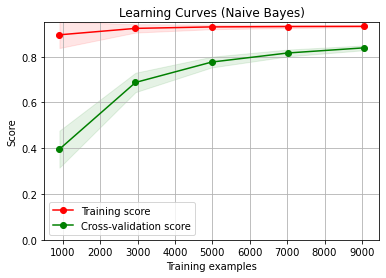

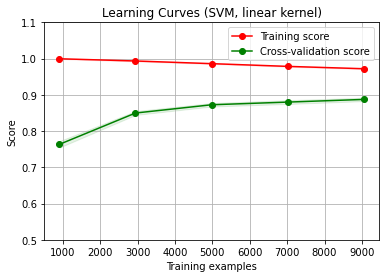

In [19]:
estimator = MultinomialNB()
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
X, y = X_train_tfidf, twenty_train.target
plot_learning_curve(estimator, title, X, y, ylim=(0.0, 0.95), cv=cv, n_jobs=8)

#from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier

#title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
title = "Learning Curves (SVM, linear kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

#estimator = SVC(gamma=0.001)

estimator = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter_no_change=5, random_state=42, verbose=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.1), cv=cv, n_jobs=8)

plt.show()

**S·ª≠ d·ª•ng GridSearch ƒë·ªÉ t√¨m tham s·ªë ph√π h·ª£p**

C√≥ th·ªÉ s·ª≠ d·ª•ng thu·∫≠t to√°n GridSearch ƒë·ªÉ t√¨m tham s·ªë ph√π h·ª£p--> tƒÉng ƒë·ªô t·ªët c·ªßa m√¥ h√¨nh.
Tuy nhi√™n, thu·∫≠t to√°n n√†y c√≥ nh∆∞·ª£c ƒëi·ªÉm l√† t·ªëc ƒë·ªô ch·∫≠m n√™n c√≥ th·ªÉ ph√π h·ª£p v·ªõi b·ªô d·ªØ li·ªáu nh·ªè.
V·ªõi b·ªô d·ªØ li·ªáu l·ªõn thu·∫≠t to√°n ch·∫°y trong th·ªùi gian l√¢u

In [26]:
# Grid Search
# Here, we are creating a list of parameters for which we would like to do performance tuning. 
# All the parameters name start with the classifier name (remember the arbitrary name we gave). 
# E.g. vect__ngram_range; here we are telling to use unigram and bigrams and choose the one which is optimal.

from sklearn.model_selection import GridSearchCV
#cv ko ƒë∆Ø·ª£c ch·ªâ ƒë·ªãnh n√™n m·∫∑c ƒë·ªãnh l√† 5-fold cross-validation
parameters = {'vect__ngram_range': [(1, 1),(1, 2),(1, 3)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}

'''
ngram_range ƒë∆∞·ª£c ƒë·∫∑t l√† [(1, 1), (1, 2)], 
c√≥ nghƒ©a l√† CountVectorizer s·∫Ω t·∫°o ra c√°c ƒë·∫∑c tr∆∞ng t·ª´ m·ªôt t·ª´ ƒë∆°n (unigram) v√† c√°c c·∫∑p t·ª´ li·ªÅn k·ªÅ (bigram).
(1, 1) ƒë·∫°i di·ªán cho unigram, nghƒ©a l√† m·ªói t·ª´ trong vƒÉn b·∫£n ban ƒë·∫ßu s·∫Ω ƒë∆∞·ª£c coi l√† m·ªôt ƒë·∫∑c tr∆∞ng ri√™ng bi·ªát.
(1, 2) ƒë·∫°i di·ªán cho bigram, nghƒ©a l√† m·ªói c·∫∑p t·ª´ li·ªÅn k·ªÅ trong vƒÉn b·∫£n s·∫Ω ƒë∆∞·ª£c coi l√† m·ªôt ƒë·∫∑c tr∆∞ng ri√™ng bi·ªát.
'''

'\nngram_range ƒë∆∞·ª£c ƒë·∫∑t l√† [(1, 1), (1, 2)], \nc√≥ nghƒ©a l√† CountVectorizer s·∫Ω t·∫°o ra c√°c ƒë·∫∑c tr∆∞ng t·ª´ m·ªôt t·ª´ ƒë∆°n (unigram) v√† c√°c c·∫∑p t·ª´ li·ªÅn k·ªÅ (bigram).\n(1, 1) ƒë·∫°i di·ªán cho unigram, nghƒ©a l√† m·ªói t·ª´ trong vƒÉn b·∫£n ban ƒë·∫ßu s·∫Ω ƒë∆∞·ª£c coi l√† m·ªôt ƒë·∫∑c tr∆∞ng ri√™ng bi·ªát.\n(1, 2) ƒë·∫°i di·ªán cho bigram, nghƒ©a l√† m·ªói c·∫∑p t·ª´ li·ªÅn k·ªÅ trong vƒÉn b·∫£n s·∫Ω ƒë∆∞·ª£c coi l√† m·ªôt ƒë·∫∑c tr∆∞ng ri√™ng bi·ªát.\n'

In [27]:
# Next, we create an instance of the grid search by passing the classifier, parameters 
# and n_jobs=-1 which tells to use multiple cores from user machine.
# text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()), 
#                      ('clf', MultinomialNB())])

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)

In [28]:
# To see the best mean score and the params, run the following code

print(gs_clf.best_score_)
print(gs_clf.best_params_)

'''
0.9129399133330441 use stop word
{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

0.909757905302422 use steammed
{'clf__alpha': 0.01, 'tfidf__use_idf': False}

'''

# Output for above should be: The accuracy has now increased to ~90.6% for the NB classifier (not so naive anymore! üòÑ)
# and the corresponding parameters are {‚Äòclf__alpha‚Äô: 0.01, ‚Äòtfidf__use_idf‚Äô: True, ‚Äòvect__ngram_range‚Äô: (1, 2)}.

0.9129399133330441
{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


"\n0.9129399133330441 use stop word\n{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}\n\n0.909757905302422 use steammed\n{'clf__alpha': 0.01, 'tfidf__use_idf': False}\n\n"

In [30]:
# Similarly doing grid search for SVM
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(twenty_train.data, twenty_train.target)


gs_clf_svm.best_score_
gs_clf_svm.best_params_

{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}